In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('aud_data.csv',delimiter=';')

In [3]:
df.head()

,Date,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f24,m1,m2,m3,m4,m5,m6,m7,m8,target
0,31.12.2018,0.2,0.4,-1.0,1.8,-0.7,0.1,0.3,1.2,1.1,...,0.2,5646.3999,6.5999,2.318,1.906,1.900,1.638,-0.75,40.15,0.7049
1,30.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5654.3242,6.5981,2.362,1.942,1.934,1.647,-0.70,40.95,0.7047
4,27.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5597.2378,6.5850,2.378,1.953,1.953,1.646,-1.35,40.20,0.7033


In [4]:
df['Date']=pd.to_datetime(df['Date'], dayfirst = True)

In [5]:
df=df.set_index('Date')

In [6]:
fundamentals=df[[col for col in df.columns if 'f' in col]].columns.tolist()
market=df[[col for col in df.columns if 'm' in col]].columns.tolist()

In [7]:
df[fundamentals]=df[fundamentals].apply(lambda x: x.fillna(method='bfill').fillna(0), axis=0)

In [8]:
market_data=df[market][df.index.dayofweek<5]

In [9]:
market_data=market_data.fillna(method='bfill').fillna(method='ffill')

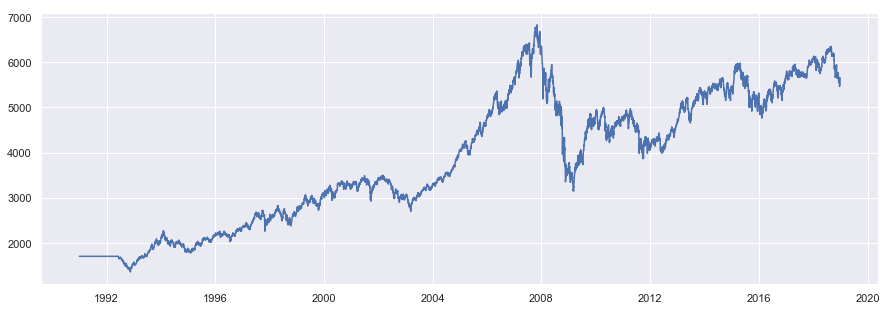

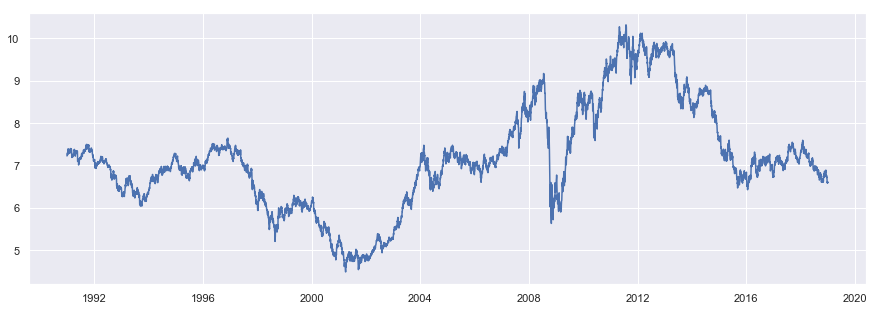

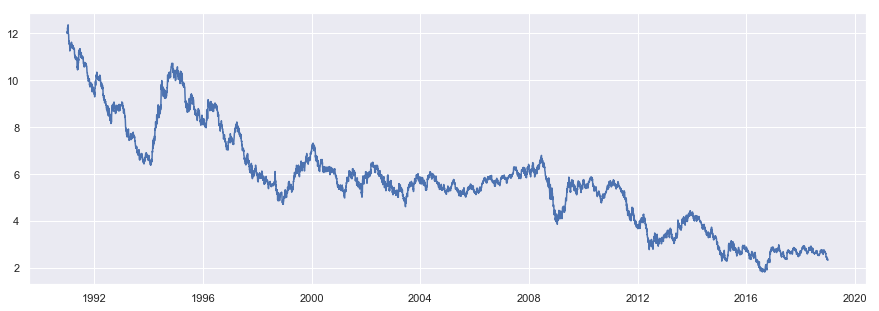

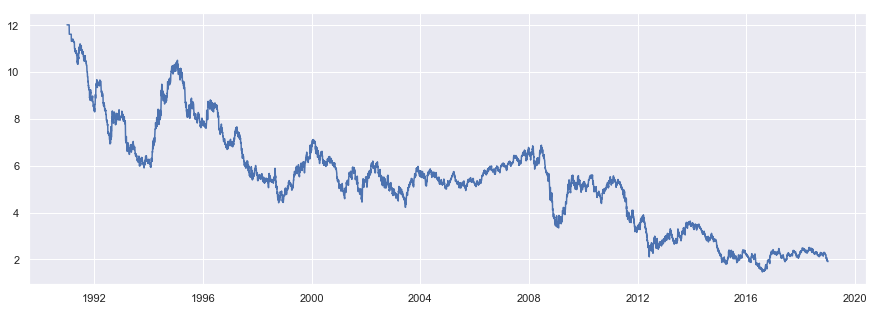

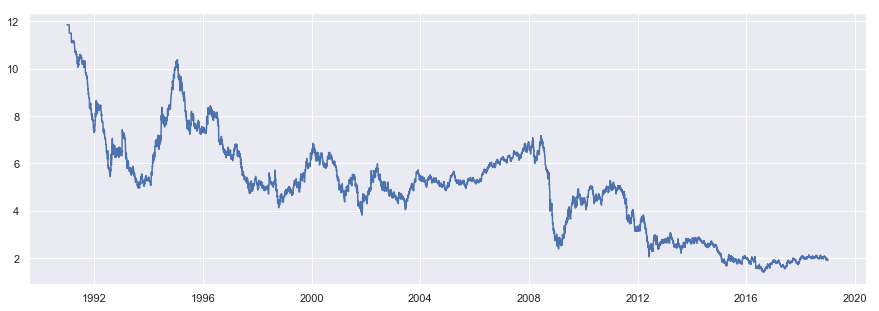

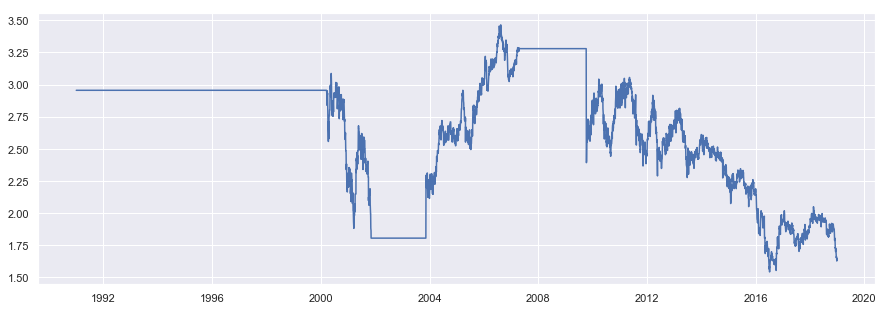

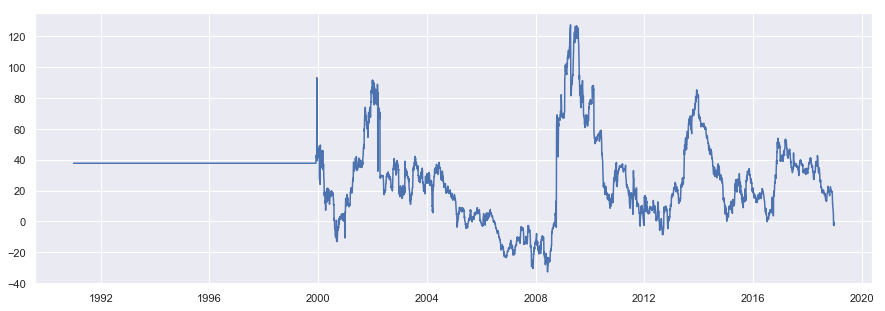

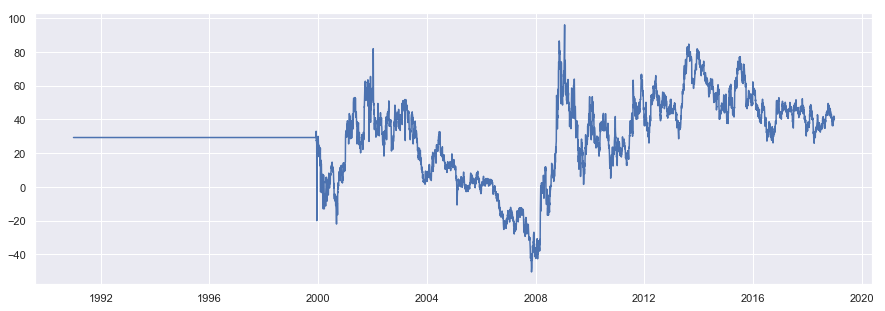

In [50]:
for column in market_data:
    plt.figure(figsize=(15,5))
    plt.plot(market_data[column])

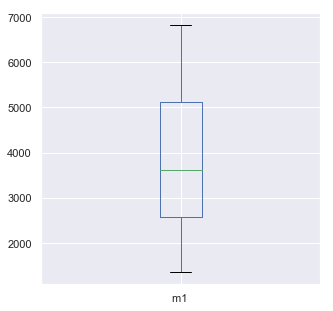

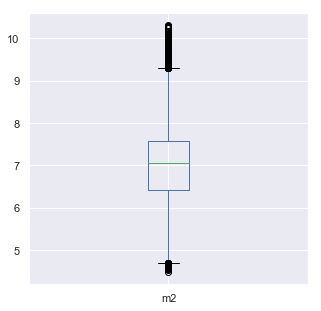

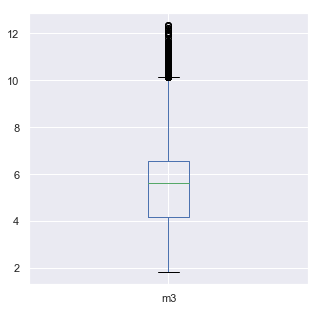

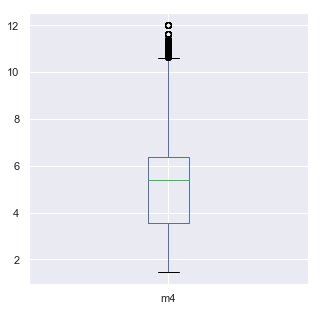

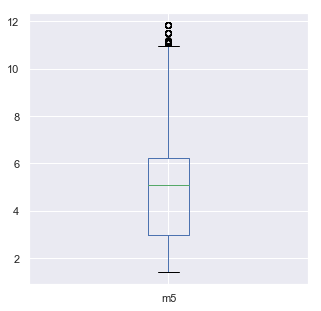

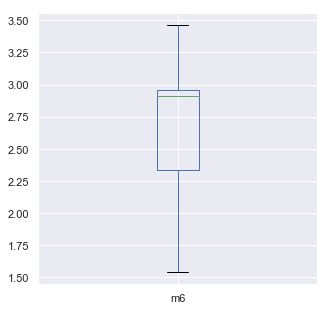

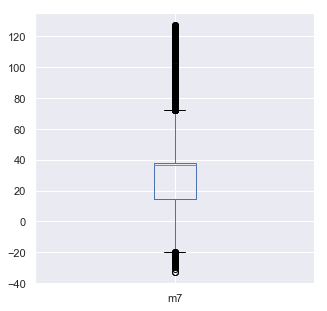

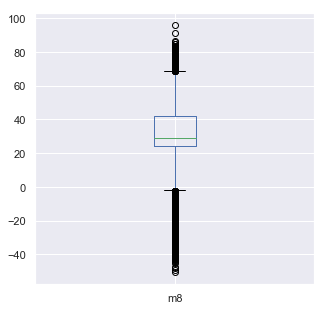

In [46]:
for column in market_data:
    plt.figure(figsize=(5,5))
    market_data.boxplot([column])

In [17]:
f0=market_data.pct_change(periods=1).fillna(method='bfill')
f1=market_data.pct_change(periods=5).fillna(method='bfill')
f2=market_data.pct_change(periods=10).fillna(method='bfill')
f3=market_data.pct_change(periods=30).fillna(method='bfill')

In [21]:
f4=f0.rolling(5).mean().fillna(method='bfill')
f5=f0.rolling(10).mean().fillna(method='bfill')
f6=f0.rolling(30).mean().fillna(method='bfill')

In [22]:
market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]]=f1
market_data[['m'+str(i)+'_pct_change_10' for i in range(1,9)]]=f2
market_data[['m'+str(i)+'_pct_change_30' for i in range(1,9)]]=f3

market_data[['m'+str(i)+'_mva_5' for i in range(1,9)]]=f4
market_data[['m'+str(i)+'_mva_10' for i in range(1,9)]]=f5
market_data[['m'+str(i)+'_mva_30' for i in range(1,9)]]=f6

In [13]:
changes=market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'_pct_change_30' for i in range(1,9)]]

In [14]:
f4=changes.rolling(5).mean()
f5=changes.rolling(10).mean()
f6=changes.rolling(30).mean()

In [15]:
market_data[['m'+str(i)+'MV_5'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_5'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_5'+'_pct_change_30' for i in range(1,9)]]=f4
            
market_data[['m'+str(i)+'MV_10'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_10'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_10'+'_pct_change_30' for i in range(1,9)]]=f5

market_data[['m'+str(i)+'MV_30'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_30'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_30'+'_pct_change_30' for i in range(1,9)]]=f6